## Problem statement 
In the fast paced taxi booking sector, making the most of revenue is essential for longterm success and driver happiness.

our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to detrmine whether payment methods have impact on fare pricing byh focusing on the relatioship between payment type and fare amount. 

### Research Questions
##### Is there a relationship between total  fare amount and payment type ?

can we nudge customers towards payments methods that generate higher revenue for drivers, without negatively impacting customer experinces ?

##### Import Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
# loadig the datasets
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


#### Exploring data analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df["tpep_pickup_datetime"]  = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["duration"] = df["duration"].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [10]:
df = df[["passenger_count" ,"payment_type", "fare_amount", "trip_distance", "duration"]]

In [11]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


check the count of value which is null...

In [12]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

check the precent value of the which is null w.r.t to dataset..

In [13]:
65441/len(df) * 100 # value in percent

1.021716132126611

In [14]:
df.dropna(inplace=True)

In [15]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


change the datatype of `passanger_count` and `payment_type` to float to int.

In [16]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

count duplicate data..


In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


delete duplicate data..


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(3007861, 5)

In [20]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [22]:
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [23]:
df.shape

(2780283, 5)

In [24]:
df['payment_type'].replace([1,2], ["card", "cash"],inplace =True)

In [25]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [26]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df= df[df['duration']>0]

In [27]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


In [28]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1 

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound)  & (df[col]<=upper_bound)]

In [29]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


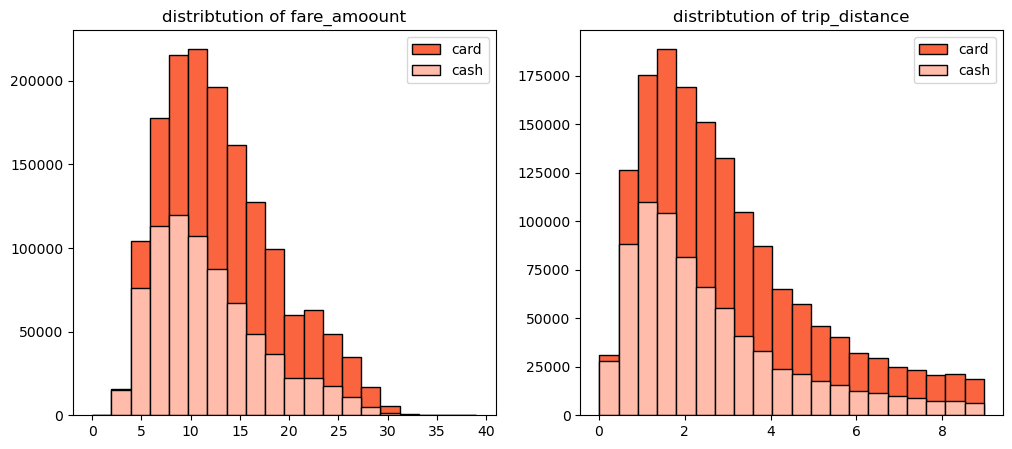

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("distribtution of fare_amoount")
plt.hist(df[df['payment_type'] == 'card'] ['fare_amount'], histtype='barstacked', bins= 20, edgecolor = 'k',color= '#fa643f', label='card')
plt.hist(df[df['payment_type'] == 'cash'] ['fare_amount'], histtype='barstacked', bins= 20, edgecolor = 'k',color= '#FFBCAB', label='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("distribtution of trip_distance")
plt.hist(df[df['payment_type'] == 'card'] ['trip_distance'], histtype='barstacked', bins= 20, edgecolor = 'k',color= '#fa643f', label='card')
plt.hist(df[df['payment_type'] == 'cash'] ['trip_distance'], histtype='barstacked', bins= 20, edgecolor = 'k',color= '#FFBCAB', label='cash')
plt.legend()

plt.show()

In [31]:
df.groupby('payment_type').agg({'fare_amount' : ['mean', 'std'], 'trip_distance':['mean' ,'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

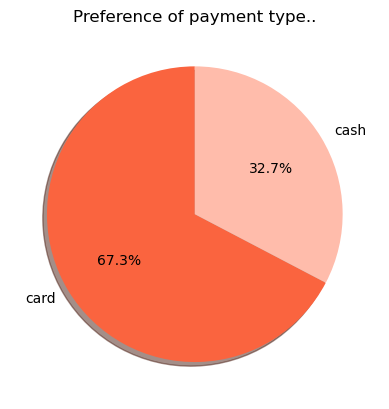

In [32]:
plt.title('Preference of payment type..')
plt.pie(df['payment_type'].value_counts(normalize = True) , labels= df['payment_type'].value_counts().index,
        startangle=  90 , shadow= True, autopct="%1.1f%%", colors= [ '#FA643F' , "#FFBCAB"])
plt.show()


In [33]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count' : 'count'},inplace = True)
passenger_count.reset_index(inplace= True)

In [34]:
passenger_count['prec'] = (passenger_count['count'] / passenger_count['count'].sum()) *100

In [35]:
passenger_count

,payment_type,passenger_count,count,prec
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [36]:
data = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
data['payment_type'] = ['card','cash']
data.iloc[0,1:]=passenger_count.iloc[0:5,-1]
data.iloc[1,1:]=passenger_count.iloc[5:,-1]
data

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


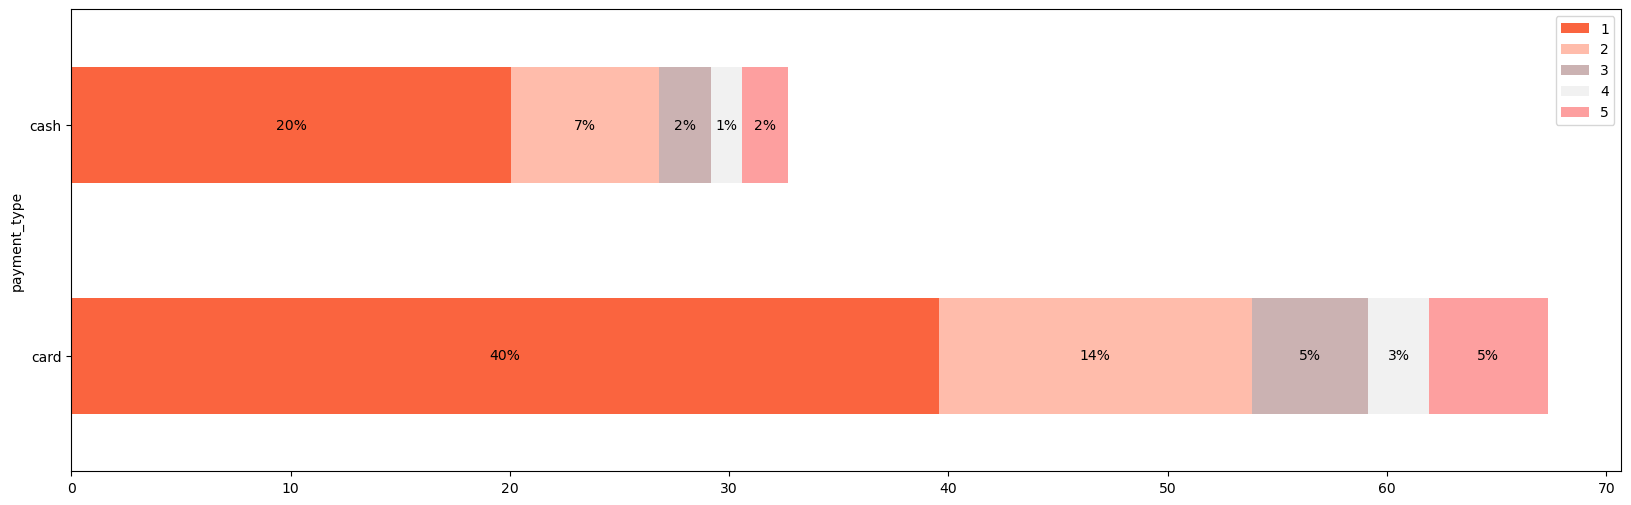

In [37]:
fig, ax = plt.subplots(figsize=(20,6))
data.plot( x='payment_type',
        kind="barh",
        stacked= True,
        ax= ax,
        color= [ '#FA643F',"#FFBCAB",'#CBB2B2','#F1F1F1','#FD9F9F'])

# ADD PERCENTAGE TEXT
for p in ax.patches:
    width =p.get_width()
    height = p.get_height()
    x,y =p.get_xy()
    ax.text(x + width /2,
            y +height /2,
            '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')

<b> Null hypothesis : </b> There is no difference in average fare between customers who use credit cards and customers who use cash.

<b> Alternative hypothesis : </b> There is a difference in average fare between customers who use credit cards and customers who use cash.

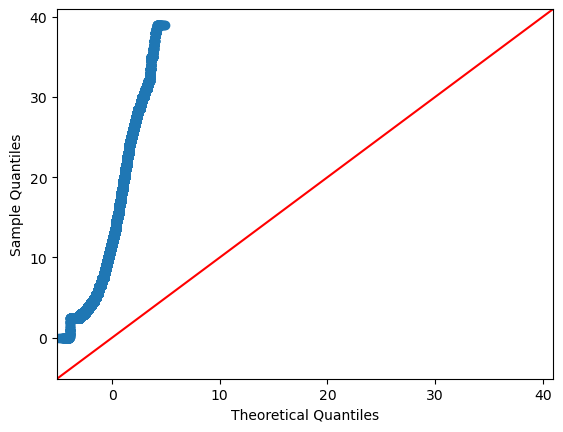

In [38]:
sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [39]:
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample = df[df['payment_type']=='cash']['fare_amount']

In [40]:
t_stats , p_value = st.ttest_ind(a=card_sample , b = cash_sample , equal_var=False)
print("T statistics" , t_stats, 'p_value',p_value)

T statistics 169.2111527245052 p_value 0.0


#### Now we perform Linear Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score


In [42]:
#  convert categorical "paymnet type" into numeric
df['payment_type'] = df['payment_type'].replace({'card':1,'cash':0})

In [43]:
# Features (X) and Target (y)
X = df[["passenger_count", "payment_type", "trip_distance", "duration"]]
y = df["fare_amount"]

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# make predictioin
y_pred = model.predict(X_test)

In [47]:
# evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [48]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.622145766561606
R-squared: 0.9816239780980179


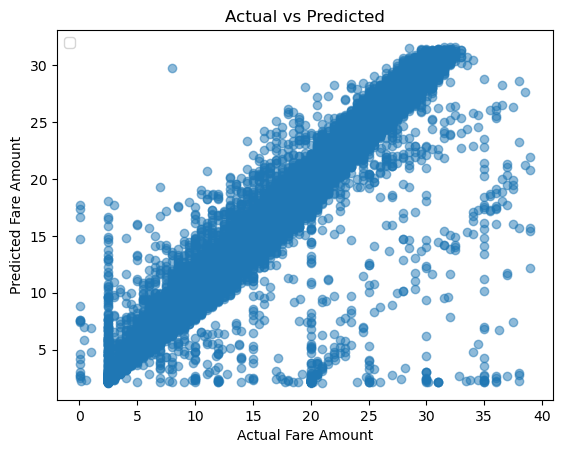

In [49]:
# Visualize actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.legend(loc="upper left")
plt.title('Actual vs Predicted')
plt.show()
